# Eigenvectors, eigenvalues and dimensionality reduction. 

## 1. A quick recap.

Let's go back to the food price data example that we used in the first lab. We pasted the necessary code below.

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
% matplotlib inline

In [9]:
data = pd.read_csv('foodusa.csv', index_col=0)

In this lab, we'll be optimizing for using as little code as possible, so let's use scikit-learns `StandardScaler()` to get to the standardized data:

In [10]:
from sklearn.preprocessing import StandardScaler
data_std = StandardScaler().fit_transform(data)
data_std = pd.DataFrame(data_std)
data_std.columns = list(data)

In [11]:
corr_mat = data_std.corr()

In [12]:
corr_mat

,Bread,Burger,Milk,Oranges,Tomatoes
Bread,1.000000,0.681700,0.328239,0.036709,0.382241
Burger,0.681700,1.000000,0.333422,0.210937,0.631898
Milk,0.328239,0.333422,1.000000,-0.002779,0.254417
Oranges,0.036709,0.210937,-0.002779,1.000000,0.358061
Tomatoes,0.382241,0.631898,0.254417,0.358061,1.000000


In [13]:
eig_values, eig_vectors = np.linalg.eig(corr_mat)

In [14]:
eig_values

array([2.42246795, 1.10467489, 0.2407653 , 0.73848053, 0.49361132])

In [15]:
eig_vectors

array([[ 0.49614868,  0.30861972,  0.49989887,  0.38639398, -0.50930459],
       [ 0.57570231,  0.04380176, -0.77263501,  0.26247227,  0.02813712],
       [ 0.33956956,  0.43080905, -0.00788224, -0.83463952, -0.0491    ],
       [ 0.22498981, -0.79677694,  0.0059668 , -0.29160659, -0.47901574],
       [ 0.50643404, -0.28702846,  0.39120139,  0.01226602,  0.71270629]])

## 2. Visualizing how much information our PCs store.

Recall from the lecture how the sum of the eigenvalues

$$ \lambda_1 + \lambda_2 + \ldots + \lambda_5 $$ 

is equal to the sum of the variance of the variables, applied to this case:

$$ var(bread) + var(burger) + var(Milk) + var(Oranges) + var(Tomatoes)$$

with standardized data, we know that this sum is equal to the number of variables in the data set, which is 5 in this case. Now let's see if our eig_values add up to 5.

In [21]:
eig_values.sum()

5.000000000000002

Looks great!

Now we go into the essentials of PCA. for each principal component (defined by the eigenvectors), the amount of variance represented in this PC is reflected by its respective eigenvalue. So what we'll want to do is *keep* PCs with a high eigenvalue, and drop the ones with a low eigenvalue.

In [43]:
eig_val_sorted = sorted(eig_values, reverse=True)

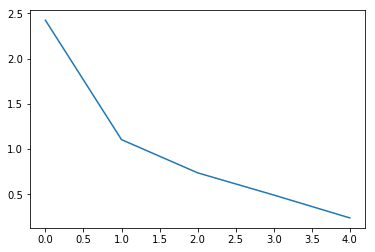

In [19]:
plt.plot(eig_val_sorted);

We can plot and a cumulative plot representing how much variance is explained with each new eigenvalue or principal components.

In [52]:
total = sum(eig_val_sorted)
eig_val_sorted/ total
cum_variance = np.cumsum(variance_explained)
cum_variance

array([ 48.44935901,  70.54285687,  85.31246751,  95.1846939 ,
       100.        ])

In [40]:
sum(eig_val_sorted)

5.000000000000001

In [24]:
cum_variance

array([ 48.44935901,  70.54285687,  85.31246751,  95.1846939 ,
       100.        ])

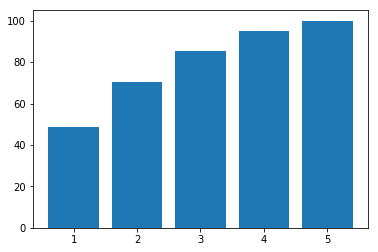

In [28]:
index = np.arange(len(cum_variance))+1
plt.bar(index, cum_variance);

Let's say we decided to keep the the PCs with an eigenvalue bigger than 1. This is a popular decision rule, which in this case leads to having 2 principal components. Let's see how we can do that and how to interpret all this, but first, let's move over to scikit learn. This library has very easy-to-use PCA capabilities, and very easy to use. Let's look at how it's done!

## 3. PCA in scikit learn

In [62]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
pca.fit(data_std)

PCA(copy=True, iterated_power='auto', n_components=5, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

You can get the eigenvalues with the method `.explained_variance_`

In [56]:
pca.explained_variance_

array([2.53258013, 1.15488739, 0.77204783, 0.5160482 , 0.25170918])

Additionally, you can get the cumulative variance using pca.explained_variance_ratio

In [66]:
exp_var_ratio = pca.explained_variance_ratio_
exp_var_ratio

array([0.48449359, 0.22093498, 0.14769611, 0.09872226, 0.04815306])

In [67]:
exp_var_ratio.cumsum()

array([0.48449359, 0.70542857, 0.85312468, 0.95184694, 1.        ])

As we said, we decided to keep 2 Principal components. Conveniently, there is the arguments `n_components` in the `PCA` function. Additionally, as you saw, the eigenvalues are already sorted according to their size!

In [68]:
from sklearn.decomposition import PCA
pca_2 = PCA(n_components=2)
pca_2.fit(data_std)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [73]:
eig_values = pca_2.explained_variance_

In [74]:
eig_vectors = pca_2.components_
eig_vectors

array([[ 0.49614868,  0.57570231,  0.33956956,  0.22498981,  0.50643404],
       [ 0.30861972,  0.04380176,  0.43080905, -0.79677694, -0.28702846]])

As seen before, 70% of the variance in the data can still be explained by just having the 2 principal components that replace the 5 variables!

## 4. Relationship with the original variables

Let's store the loadings of the principal components in `pc1` and `pc2`.

In [133]:
pc1 = pca_2.components_[0]
pc2 = pca_2.components_[1]

In [134]:
structure_loading_1 = pc1* np.sqrt(eig_values[0])
str_loading_1 = pd.Series(structure_loading_1, index=data.columns)
str_loading_1.sort_values(ascending=False)

Burger      0.916177
Tomatoes    0.805943
Bread       0.789575
Milk        0.540394
Oranges     0.358051
dtype: float64

In [135]:
structure_loading_2 = pc2* np.sqrt(eig_values[1])
str_loading_2 = pd.Series(structure_loading_2, index=data.columns)
str_loading_2.sort_values(ascending=False)

Milk        0.462972
Bread       0.331660
Burger      0.047072
Tomatoes   -0.308457
Oranges    -0.856262
dtype: float64

In [136]:
data.head()

,Bread,Burger,Milk,Oranges,Tomatoes
City,,,,,
ATLANTA,24.5,94.5,73.9,80.1,41.6
BALTIMORE,26.5,91.0,67.5,74.6,53.3
BOSTON,29.7,100.8,61.4,104.0,59.6
BUFFALO,22.8,86.6,65.3,118.4,51.2
CHICAGO,26.7,86.7,62.7,105.9,51.2


Let's try to interpret what each principal component stands for. You can argue that PC1 represents bread and burgers, let's say "processed foods". PC2 represents oranges and milk, let's call that PC the "non-processed foods". Note that both strongly positive and strongly negative PCs matter!

# 5. The new data

What you'll usually want to do is replace your 5 columns with the new data. Now, what does the new data look like? You'll need to transform your columns using the loadings used in your eigenvectors. Let's try and find the PC1 value for Atlanta!

First, let's select the attribute values for atlanta. We'll need to use the **standardized** values as this is the data we used to generate the PCs.

In [127]:
atlanta_var = data_std.loc[0]

In [131]:
atlanta_var

Bread      -0.322747
Burger      0.357765
Milk        1.707156
Oranges    -1.643751
Tomatoes   -0.963643
Name: 0, dtype: float64

Now we have to multiply this with our loadings vectors! Let's do this for both PCs

In [142]:
np.sum(atlanta_var * pc1)

-0.23231474886933007

In [143]:
np.sum(atlanta_var * pc2)

2.2378185664644534

Luckily, there is a method called `transform` in the PCA library that does this for all the observations in one step. 

In [168]:
PC_df = pd.DataFrame(pca_2.transform(data_std), index=data.index, columns=['PC1','PC2'])

In [188]:
PC_df.iloc[:,0]

City
ATLANTA         -0.232315
BALTIMORE        0.288023
BOSTON           2.298492
BUFFALO         -0.348852
CHICAGO          0.116322
CINCINNATI       0.605998
CLEVELAND       -1.242714
DALLAS          -1.121562
DETROIT         -0.280792
HONALULU         4.168851
HOUSTON         -1.316582
KANSAS CITY     -0.324461
LOS ANGELES     -1.211956
MILWAUKEE       -1.118232
MINNEAPOLIS     -0.452064
NEW YORK         3.779884
PHILADELPHIA     0.894790
PITTSBURGH       0.619647
ST LOUIS         0.233133
SAN DIEGO       -1.932777
SAN FRANCISCO   -0.880164
SEATTLE         -2.137999
WASHINGTON DC   -0.404672
Name: PC1, dtype: float64

Nice! Let's now look at a biplot to get a sense of what's happening.


# 6. Look at a biplot

NEEDS TO BE FIXED

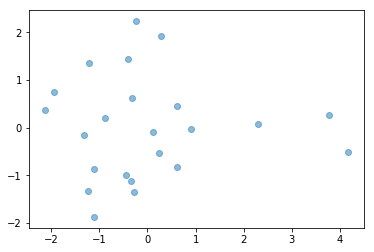

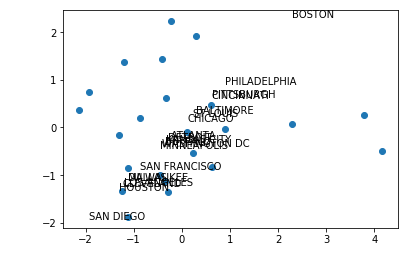

In [193]:
plt.scatter(PC_df.iloc[:,0], PC_df.iloc[:,1], alpha=0.5)


fig, ax = plt.subplots()
ax.scatter(PC_df.iloc[:,0], PC_df.iloc[:,1])

for i, txt in enumerate(data.index):
    ax.annotate(txt, (PC_df.iloc[:,0][i],PC_df.iloc[:,0][i]))

In [194]:
data.index

Index(['ATLANTA', 'BALTIMORE', 'BOSTON', 'BUFFALO', 'CHICAGO', 'CINCINNATI',
       'CLEVELAND', 'DALLAS', 'DETROIT', 'HONALULU', 'HOUSTON', 'KANSAS CITY',
       'LOS ANGELES', 'MILWAUKEE', 'MINNEAPOLIS', 'NEW YORK', 'PHILADELPHIA',
       'PITTSBURGH', 'ST LOUIS', 'SAN DIEGO', 'SAN FRANCISCO', 'SEATTLE',
       'WASHINGTON DC'],
      dtype='object', name='City')

In [196]:
PC_df.iloc[:,0][1]

0.2880227138100246